# SNP overlap analysis for j5-7 and j5-6 eQTLs

In [1]:
import subprocess
import pandas as pd
from plotnine import  *

In [2]:
def get_nominal_eqtl_df(fn, gene):
    with subprocess.Popen(['tabix', '-h', fn, gene], stdout=subprocess.PIPE) as p:
        df = pd.read_csv(p.stdout, sep='\t')
    return df    

In [4]:
## Junction 5-7
j57 = get_nominal_eqtl_df('/ceph/projects/v4_phase3_paper/analysis/eqtl_analysis/all/junctions/'+\
                          'expression_gct/prepare_expression/fastqtl_nominal/tabix/_m/'+\
                          'Brainseq_LIBD.allpairs.txt.gz', 'chr11:113412884-113415420(-)')
display(j57.shape)
## Junction 5-6
j56 = get_nominal_eqtl_df('/ceph/projects/v4_phase3_paper/analysis/eqtl_analysis/all/junctions/'+\
                          'expression_gct/prepare_expression/fastqtl_nominal/tabix/_m/'+\
                          'Brainseq_LIBD.allpairs.txt.gz', 'chr11:113414462-113415420(-)')
display(j56.shape)

(0, 9)

(0, 9)

In [4]:
df = j57.merge(j56, left_on='variant_id', right_on='variant_id', suffixes=['_j57', '_j56'])
df.to_csv('j57_and_j56_eqtls.tsv', sep='\t')
df

,#gene_id_j57,variant_id,tss_distance_j57,ma_samples_j57,ma_count_j57,maf_j57,pval_nominal_j57,slope_j57,slope_se_j57,#gene_id_j56,tss_distance_j56,ma_samples_j56,ma_count_j56,maf_j56,pval_nominal_j56,slope_j56,slope_se_j56
0,chr11:113412884-113415420(-),chr11:112915023:C:T,-497862,17,17,0.019187,0.957382,0.009916,0.185448,chr11:113414462-113415420(-),-499440,17,17,0.019187,0.471292,0.085782,0.118967
1,chr11:113412884-113415420(-),chr11:112915565:C:G,-497320,257,314,0.354402,0.860280,-0.009033,0.051284,chr11:113414462-113415420(-),-498898,257,314,0.354402,0.375226,-0.029196,0.032890
2,chr11:113412884-113415420(-),chr11:112915724:A:T,-497161,267,339,0.382619,0.858508,-0.008798,0.049321,chr11:113414462-113415420(-),-498739,267,339,0.382619,0.201899,-0.040389,0.031598
3,chr11:113412884-113415420(-),chr11:112915726:T:G,-497159,267,339,0.382619,0.858508,-0.008798,0.049321,chr11:113414462-113415420(-),-498737,267,339,0.382619,0.201899,-0.040389,0.031598
4,chr11:113412884-113415420(-),chr11:112915768:A:G,-497117,10,10,0.011287,0.890749,-0.033245,0.241879,chr11:113414462-113415420(-),-498695,10,10,0.011287,0.301743,-0.160343,0.155066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,chr11:113412884-113415420(-),chr11:113910929:A:T,498044,187,212,0.239278,0.586622,0.032139,0.059060,chr11:113414462-113415420(-),496466,187,212,0.239278,0.625865,-0.018499,0.037914
3519,chr11:113412884-113415420(-),chr11:113911016:T:C,498131,47,50,0.056433,0.578121,-0.062117,0.111604,chr11:113414462-113415420(-),496553,47,50,0.056433,0.872913,0.011471,0.071666
3520,chr11:113412884-113415420(-),chr11:113911376:A:G,498491,50,53,0.059819,0.910287,-0.012361,0.109637,chr11:113414462-113415420(-),496913,50,53,0.059819,0.741088,0.023267,0.070370
3521,chr11:113412884-113415420(-),chr11:113911417:A:G,498532,270,339,0.382619,0.731091,0.017889,0.052018,chr11:113414462-113415420(-),496954,270,339,0.382619,0.983714,-0.000682,0.033396


/usr/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: eQTL_scatter_plot_j57_j57_LIBD_caudate.pdf


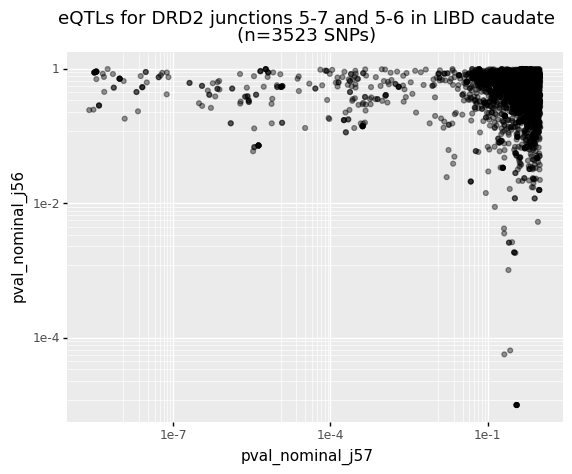

<ggplot: (8782768996533)>

In [5]:
p = (ggplot(df, aes(x='pval_nominal_j57', y='pval_nominal_j56')) + geom_point(alpha=.4) + scale_x_log10() + scale_y_log10() 
 + ggtitle('eQTLs for DRD2 junctions 5-7 and 5-6 in LIBD caudate\n(n=%d SNPs)' % df.shape[0])
)

p.save('eQTL_scatter_plot_j57_j57_LIBD_caudate.pdf')
display(p)

In [9]:
df[['variant_id', 'pval_nominal_j57', 'pval_nominal_j56']].sort_values('pval_nominal_j57').head(15)

,variant_id,pval_nominal_j57,pval_nominal_j56
1764,chr11:113445380:G:C,2.523290e-09,0.244678
1715,chr11:113429107:G:A,3.033610e-09,0.248144
1671,chr11:113418344:C:T,3.167710e-09,0.886098
1627,chr11:113410002:C:A,3.167710e-09,0.886098
1625,chr11:113409199:C:T,3.167710e-09,0.886098
1606,chr11:113404049:C:T,3.167710e-09,0.886098
1633,chr11:113411368:G:A,3.167710e-09,0.886098
1638,chr11:113411947:A:C,3.430140e-09,0.912641
1653,chr11:113413863:TG:T,3.430140e-09,0.912641
1646,chr11:113412966:C:A,3.430140e-09,0.912641


In [11]:
df[['variant_id', 'pval_nominal_j57', 'pval_nominal_j56']].sort_values('pval_nominal_j56').head(15)

,variant_id,pval_nominal_j57,pval_nominal_j56
1651,chr11:113413803:C:T,0.355662,0.000010
1644,chr11:113412842:G:A,0.355662,0.000010
1626,chr11:113409929:C:G,0.355662,0.000010
1619,chr11:113407328:A:G,0.355662,0.000010
1617,chr11:113407147:C:T,0.355662,0.000010
1614,chr11:113406477:G:A,0.355662,0.000010
1707,chr11:113427419:G:A,0.207296,0.000057
1722,chr11:113431733:G:A,0.267999,0.000065
559,chr11:113072525:C:T,0.248479,0.001022
1987,chr11:113522529:T:G,0.337342,0.001832
